# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
import os

In [3]:
os.getcwd() #checking the current working directory

'C:\\Users\\hp\\Desktop\\ML Projects\\Celeb-A'

# Importing the dataset as a Panadas dataframe for exploration


In [5]:
path = 'C:/Users/hp/Desktop/ML Projects/Celeb-A'
attr = pd.read_csv(path+'/list_attr_celeba.csv')
attr.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [34]:
#list of available Features

for i, j in enumerate(attr.columns):
    print(i, j)

0 image_id
1 5_o_Clock_Shadow
2 Arched_Eyebrows
3 Attractive
4 Bags_Under_Eyes
5 Bald
6 Bangs
7 Big_Lips
8 Big_Nose
9 Black_Hair
10 Blond_Hair
11 Blurry
12 Brown_Hair
13 Bushy_Eyebrows
14 Chubby
15 Double_Chin
16 Eyeglasses
17 Goatee
18 Gray_Hair
19 Heavy_Makeup
20 High_Cheekbones
21 Male
22 Mouth_Slightly_Open
23 Mustache
24 Narrow_Eyes
25 No_Beard
26 Oval_Face
27 Pale_Skin
28 Pointy_Nose
29 Receding_Hairline
30 Rosy_Cheeks
31 Sideburns
32 Smiling
33 Straight_Hair
34 Wavy_Hair
35 Wearing_Earrings
36 Wearing_Hat
37 Wearing_Lipstick
38 Wearing_Necklace
39 Wearing_Necktie
40 Young


In [35]:
attr.info() #information about the available features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
image_id               202599 non-null object
5_o_Clock_Shadow       202599 non-null int64
Arched_Eyebrows        202599 non-null int64
Attractive             202599 non-null int64
Bags_Under_Eyes        202599 non-null int64
Bald                   202599 non-null int64
Bangs                  202599 non-null int64
Big_Lips               202599 non-null int64
Big_Nose               202599 non-null int64
Black_Hair             202599 non-null int64
Blond_Hair             202599 non-null int64
Blurry                 202599 non-null int64
Brown_Hair             202599 non-null int64
Bushy_Eyebrows         202599 non-null int64
Chubby                 202599 non-null int64
Double_Chin            202599 non-null int64
Eyeglasses             202599 non-null int64
Goatee                 202599 non-null int64
Gray_Hair              202599 non-null int64
Heavy_Makeup           202599 non

In [65]:
attr.columns.isnull() #Check for missing values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

it is preety clear from the above information that there is no missing value in our dataset and also the features are binary where 1 indicates the person possess the feature and -1 if he/she doesn't possess.

In [8]:
#Statistical Analysis(min,max,std etc.) of data using the describe() method
subset_attr = ['Attractive','Bald','Black_Hair','Smiling','Wavy_Hair']
attr_sub = attr[subset_attr]
attr_sub.describe()

,Attractive,Bald,Black_Hair,Smiling,Wavy_Hair
count,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000
mean,0.02501,-0.955113,-0.521498,-0.035839,-0.360866
std,0.99969,0.296241,0.853255,0.999360,0.932620
min,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.00000,-1.000000,-1.000000,-1.000000,-1.000000
75%,1.00000,-1.000000,-1.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000


In [36]:
#Checking the shape of the dataframe


attr.set_index('image_id', inplace=True)
shape = attr.shape
features_count = shape[1]
samples_count = shape[0]
print('Total no of features: ',features_count)
print('Total no of samples: ',samples_count)

Total no of features:  40
Total no of samples:  202599


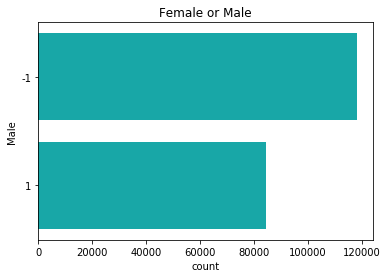

In [66]:
# Female or Male
plt.title('Female or Male')
sns.countplot(y='Male', data=attr, color="c")
plt.show()

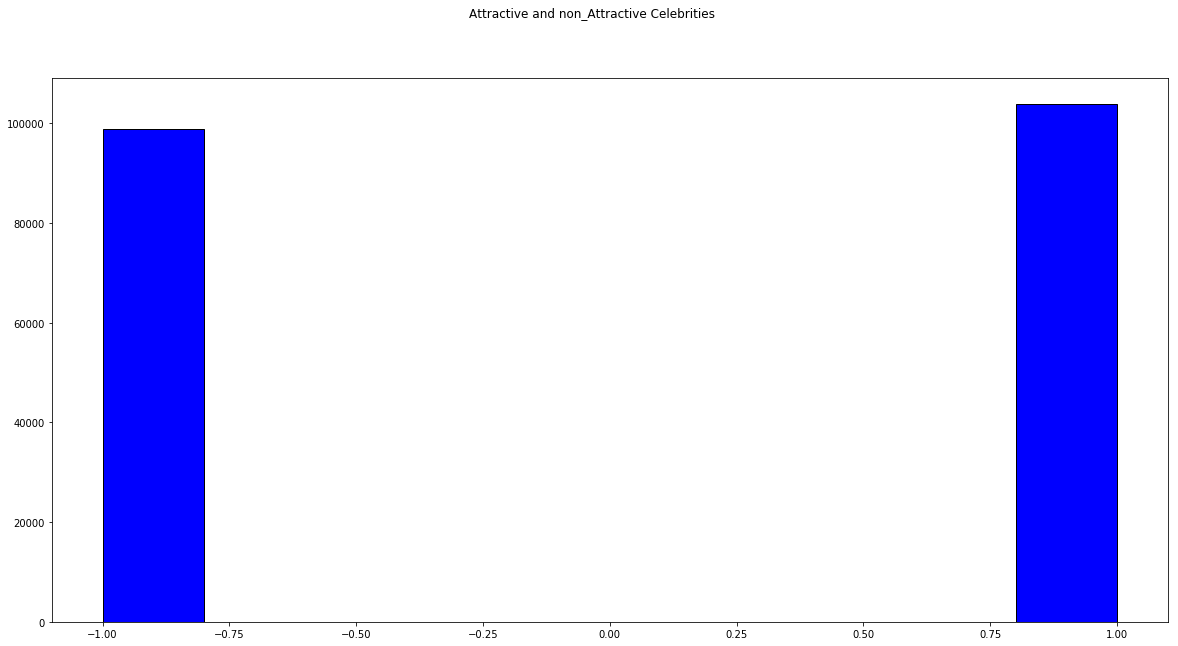

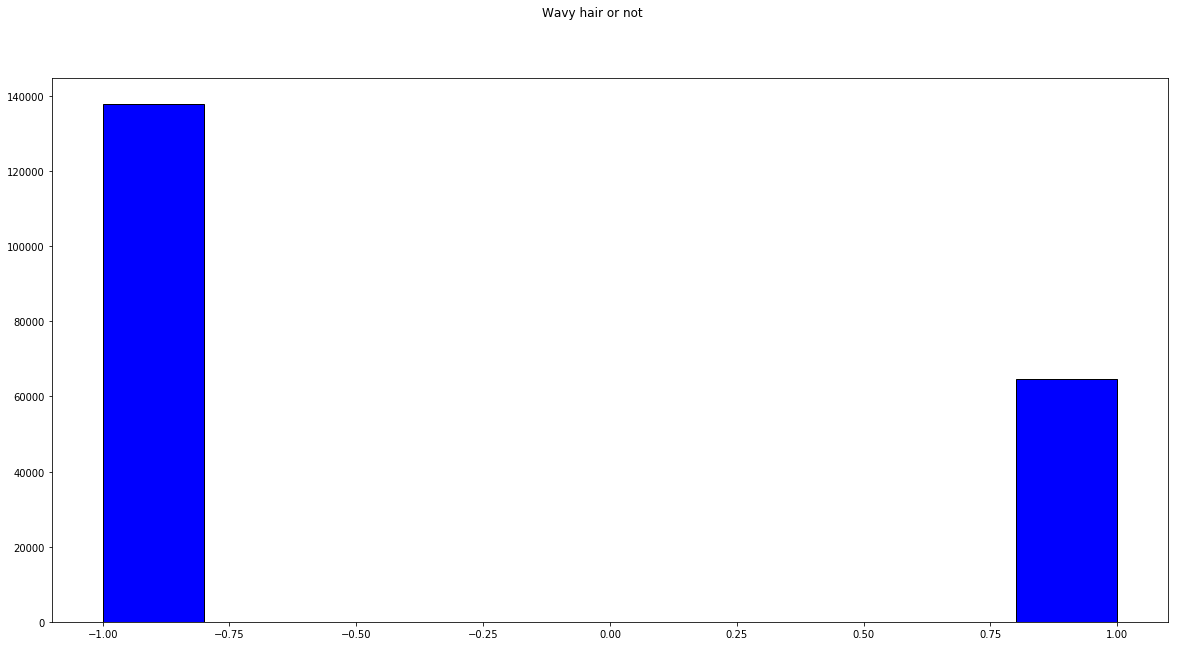

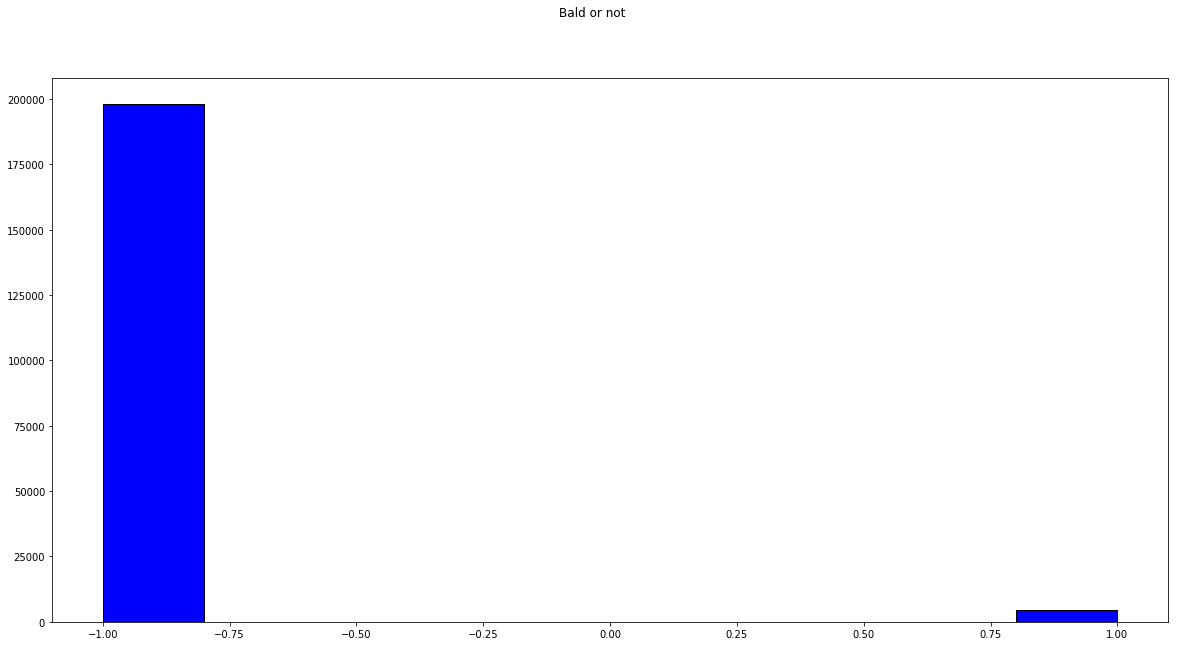

In [24]:
# Plotting histogram of different features
def plot_hist(feature,title):
    fig = plt.figure(figsize = (20,10))
    title = fig.suptitle(str(title))
    ax = fig.add_subplot(1,1, 1)
    #ax.set_xlabel("Bald")
    #ax.set_ylabel("Frequency")
    ax.hist(attr[str(feature)], color='blue', edgecolor='black')
    plt.show()

plot_hist('Attractive','Attractive and non_Attractive Celebrities')
plot_hist('Wavy_Hair','Wavy hair or not')
plot_hist('Bald','Bald or not')

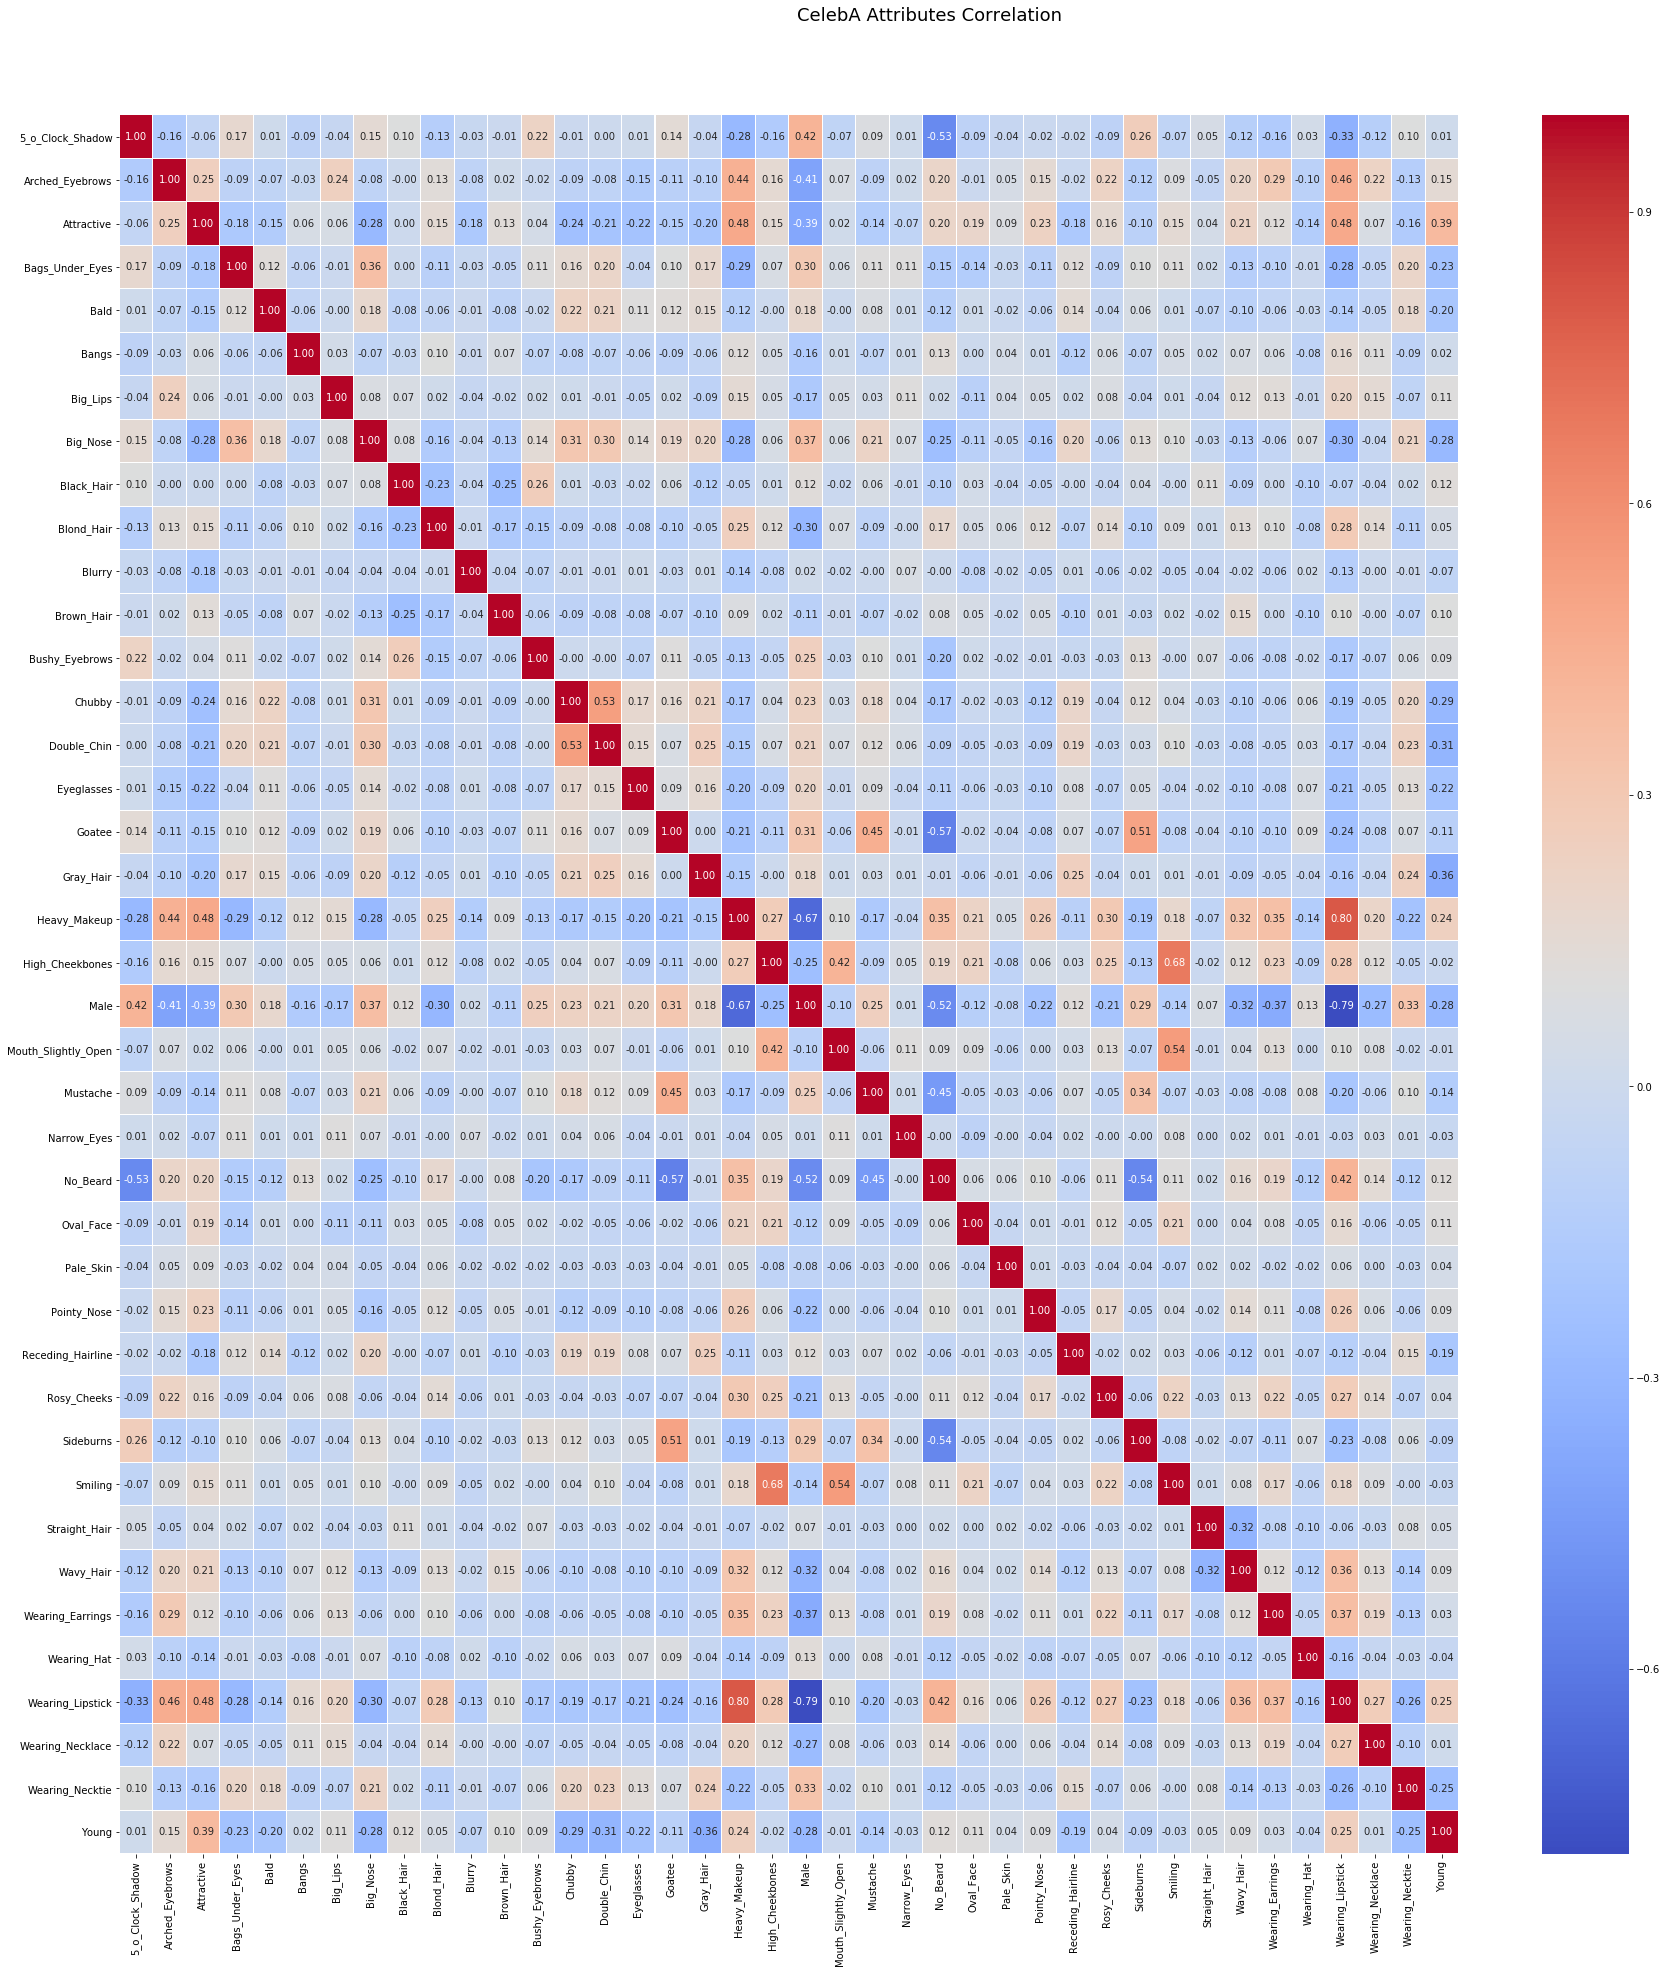

In [30]:
# Correlation matrix heatmap
f,ax = plt.subplots(figsize=(30,30))
corr_mat = attr.corr()
hm = sns.heatmap(round(corr_mat,2),fmt='.2f',cmap="coolwarm",linewidths=.05,annot=True)

f.subplots_adjust(top=0.93)
t= f.suptitle('CelebA Attributes Correlation', fontsize=18)


From the Heatmap above we can clearly point out how the features are correlated to each other. here red indicates high correlation(Low Variance) and blue for low correlation(High Variance)(According to the intensity of the colors as well as values displayed).It helps us to find the linearity between the variables so that we can discard them to reduce the dimensionality without compromising the model performance.

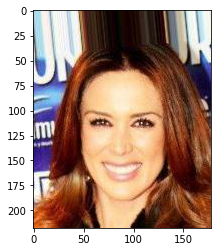

Smiling       1
Male         -1
Bald         -1
Young         1
Wavy_Hair     1
Attractive    1
Name: 000045.jpg, dtype: int64

In [58]:
#Visualising a Sample Picture

img_folder = path+"/img_align_celeba"
ex_pic = img_folder+"/000045.jpg"
img = plt.imread(ex_pic)
plt.imshow(img)
plt.show()
attr.loc[ex_pic.split('/')[-1]][['Smiling','Male','Bald','Young','Wavy_Hair','Attractive']]

In [56]:
img.shape #Checking the shape of the image

(218, 178, 3)

It's a (218,178) picture with three channels(RGB)